In [1]:
from main import *
from PIL import Image
day_title = Image.open(r"C:\Users\USER\Crime_Data_Analysis\pics\crime_by_day.png")
day_title = day_title.crop((200,130,1920,424))
title = Image.open(r"C:\Users\USER\Crime_Data_Analysis\pics\basic_analysis.png")
title = title.crop((200,200,1800,650))
top_ten = Image.open(r"C:\Users\USER\Crime_Data_Analysis\pics\top_ten.png")
top_ten = top_ten.crop((180,130,1820,430))
three_common = Image.open(r"C:\Users\USER\Crime_Data_Analysis\pics\three_common.png")
three_common = three_common.crop((0,300,1920,460))
crimes_by_hour = Image.open(r"C:\Users\USER\Crime_Data_Analysis\pics\crimes_by_houre.png")
crimes_by_hour = crimes_by_hour.crop((100,330,1920,450))

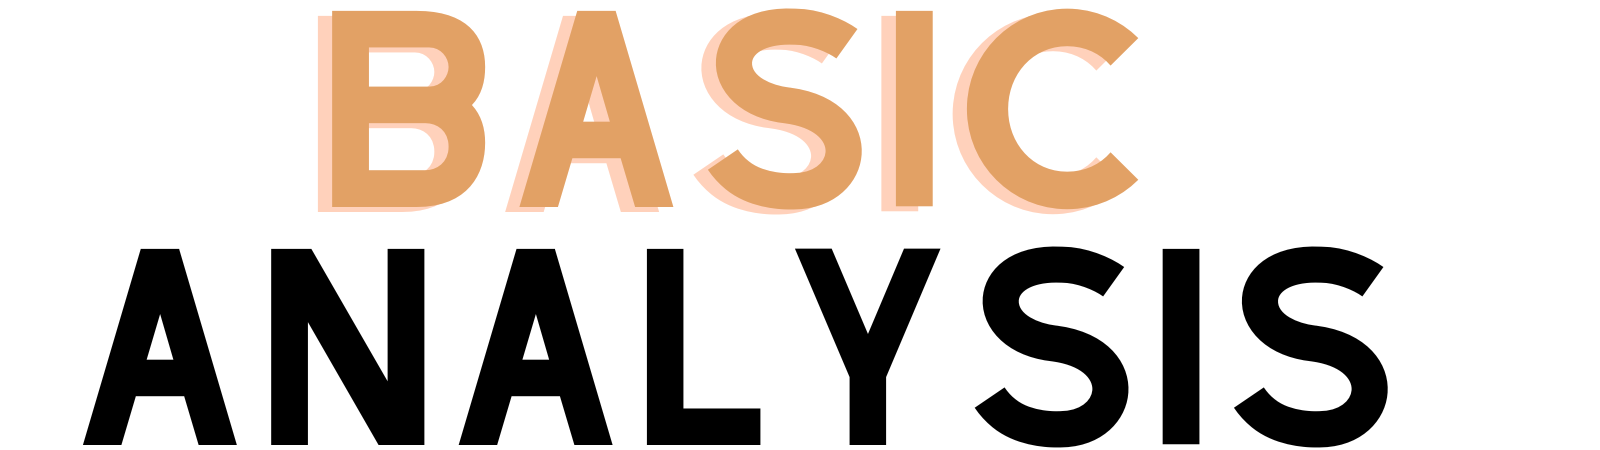

In [4]:
title

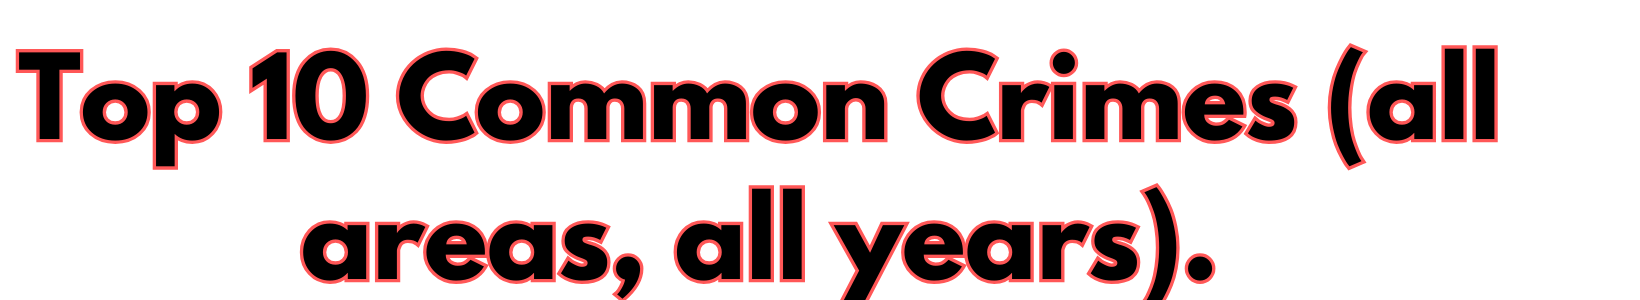

In [6]:
top_ten


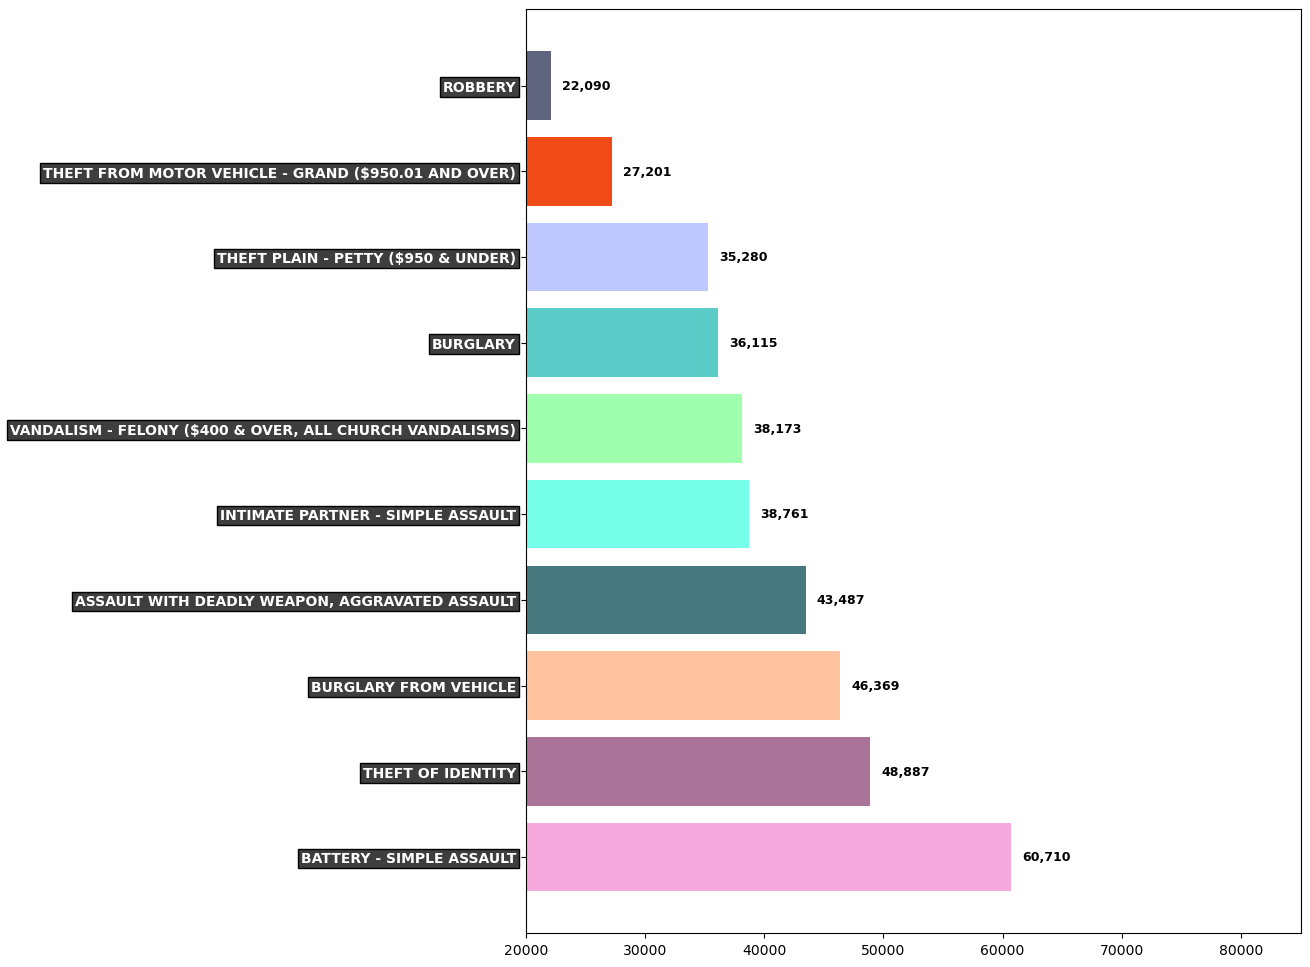

In [21]:
#Top 10 Common Crimes
top_10_crimes =Fact['Crime_Code'].value_counts().reset_index().rename(columns = {"Crime_Code":"crime_count","index":"Crime_Code"})
top_10_crimes = top_10_crimes.merge(Dim_Crime,on = 'Crime_Code').head(10)
top_10_crimes = top_10_crimes[['Crime_Desc','crime_count']]
crime_description = top_10_crimes['Crime_Desc'].tolist()
crime_count = top_10_crimes['crime_count'].tolist()

fig = plt.figure(figsize=(10, 12))  
plt.xlim(20000, 85000) 
barim = plt.barh(crime_description, crime_count, color=['#f6a9dc', '#a97497', '#ffc39f', '#46787d', '#75ffe8', '#9fffaf', '#5cccc8', '#bec8ff', '#f04a17', '#5f647f'])
for bar, value in zip(barim, crime_count):
    width = bar.get_width()
    plt.text(width + 5000, bar.get_y() + bar.get_height() / 2, f'{int(value):,}', ha='right', va='center', color='black', fontsize=9, weight='bold')
ax = plt.gca()
for label in ax.get_yticklabels(): 
    label.set_bbox({'facecolor':'#3e3e3e', "edgecolor":'black', 'pad':2})
    label.set_color('white')
    label.set_weight('bold')
plt.show()

#Here are the results ⬇️

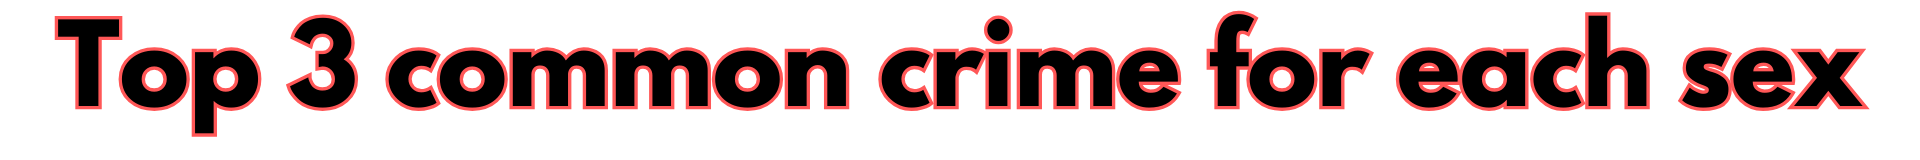

In [8]:
three_common

In [9]:
# Top 3 common crime for each sex:

report_victim = Fact[['File_Number','Crime_Code']].merge(Dim_Crime,how = 'left',on = 'Crime_Code').merge(Dim_Victim, on = 'File_Number')
crime_groupby_sex = report_victim.groupby(['Vict_Sex','Crime_Desc'])['File_Number'].count().reset_index().sort_values(by = ['Vict_Sex','File_Number'])
crime_groupby_sex['rank'] = crime_groupby_sex.groupby(['Vict_Sex'])['File_Number'].rank(method = 'dense',ascending = False)
crime_groupby_sex = crime_groupby_sex[crime_groupby_sex['rank'].isin([1,2,3])]
crime_groupby_sex.drop(['rank'],axis = 1,inplace = True)
crime_groupby_sex.reset_index(drop = True,inplace = True)
crime_groupby_sex = crime_groupby_sex.sort_values(by = ['Vict_Sex','File_Number'],ascending = False)
crime_groupby_sex['Rank'] = crime_groupby_sex.groupby(['Vict_Sex'])['File_Number'].rank(method = 'dense',ascending = False).astype(int)
crime_groupby_sex.reset_index(drop = True)
crime_groupby_sex = crime_groupby_sex[['Vict_Sex','Crime_Desc']]
crime_groupby_sex

,Vict_Sex,Crime_Desc
5,M,BATTERY - SIMPLE ASSAULT
4,M,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
3,M,BURGLARY FROM VEHICLE
2,F,INTIMATE PARTNER - SIMPLE ASSAULT
1,F,THEFT OF IDENTITY
0,F,BATTERY - SIMPLE ASSAULT


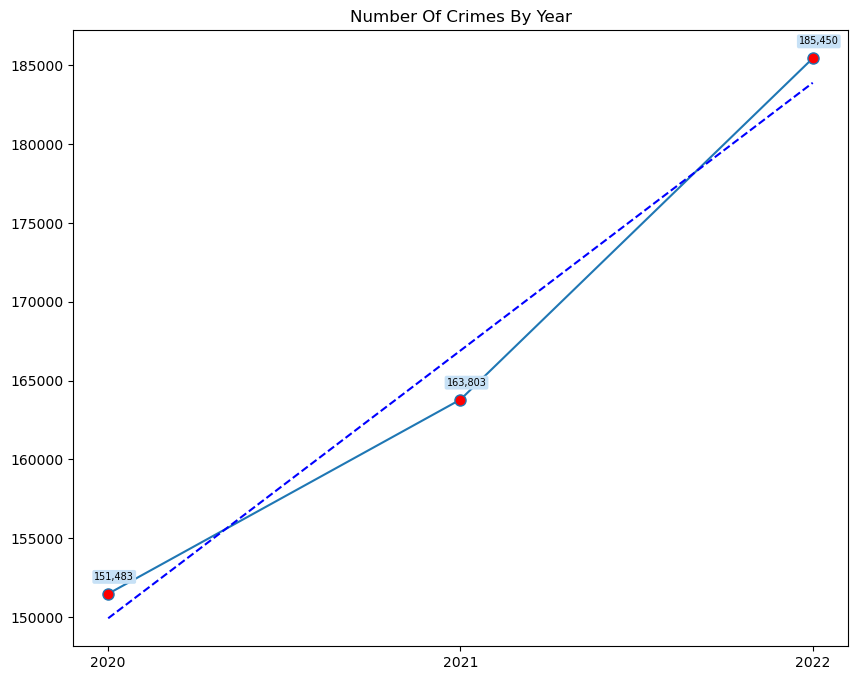

In [10]:
#crimes by year 
number_of_crimes_by_year = (data[['File_Number','Report_Date']].merge(Dim_Date,how = 'left',on = 'Report_Date'))['year'].value_counts().reset_index().sort_values(by=['index'],ascending = [True]).rename(columns = {"index":"year","year":"number_of_crimes"}).reset_index(drop=True)
number_of_crimes_by_year = number_of_crimes_by_year[number_of_crimes_by_year['year']!=2023]
year = number_of_crimes_by_year['year']
number_of_crimes = number_of_crimes_by_year['number_of_crimes']

fig,axe = plt.subplots(figsize = (10,8))
axe.plot(year, number_of_crimes,marker = 'o', markerfacecolor = 'red',markersize = 8)
axe.set_xticks(year)
axe.set_title("Number Of Crimes By Year")

z = np.polyfit(year, number_of_crimes, 1)
p = np.poly1d(z)
axe.plot(year, p(year), "b--")


for x,y in zip(year,number_of_crimes):
    plt.annotate('{:,.0f}'.format(y),(x,y),textcoords = 'offset points',xytext = (-10,10),ha='left',fontsize = 7, bbox = {'facecolor':'#c7e1f6','edgecolor':'none', 'boxstyle':"round,pad=0.2"})

plt.show()

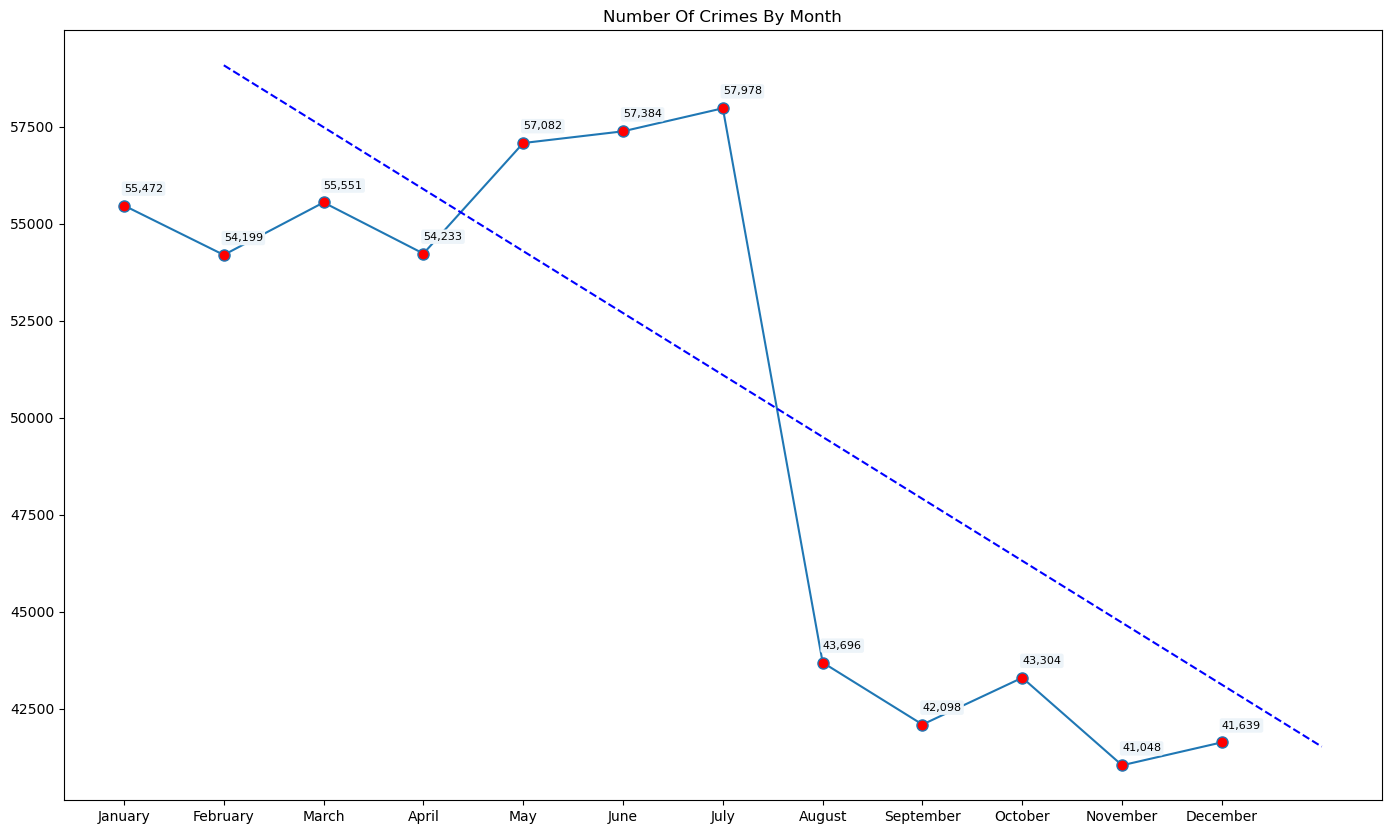

In [8]:
#number of crimes by month 
import calendar

number_of_crimes_by_month = (data[['File_Number','Report_Date']].merge(Dim_Date,how = 'left',on = 'Report_Date'))['month'].value_counts().reset_index().sort_values(by=['index'],ascending = [True]).rename(columns = {"index":"month","month":"number_of_crimes"}).reset_index(drop=True)
month=list(calendar.month_name[1:])
count=number_of_crimes_by_month['number_of_crimes']

fig,axe = plt.subplots(figsize=(17,10))
axe.plot(month,count,marker = 'o',markerfacecolor = 'red',markersize = 8)
axe.set_title('Number Of Crimes By Month')
axe.set_xticks(month)

z = np.polyfit(list(range(1,13)),count,1)
p = np.poly1d(z)
axe.plot(list(range(1,13)),p(list(range(1,13))),'b--')

for x,y in zip(month, count):
    plt.annotate('{:,.0f}'.format(y),(x,y),textcoords = 'offset points',xytext=(0,10),ha='left',fontsize=8,bbox = {"facecolor":'#edf4f9','edgecolor':'none','boxstyle':'round,pad=0.2'})
plt.show()




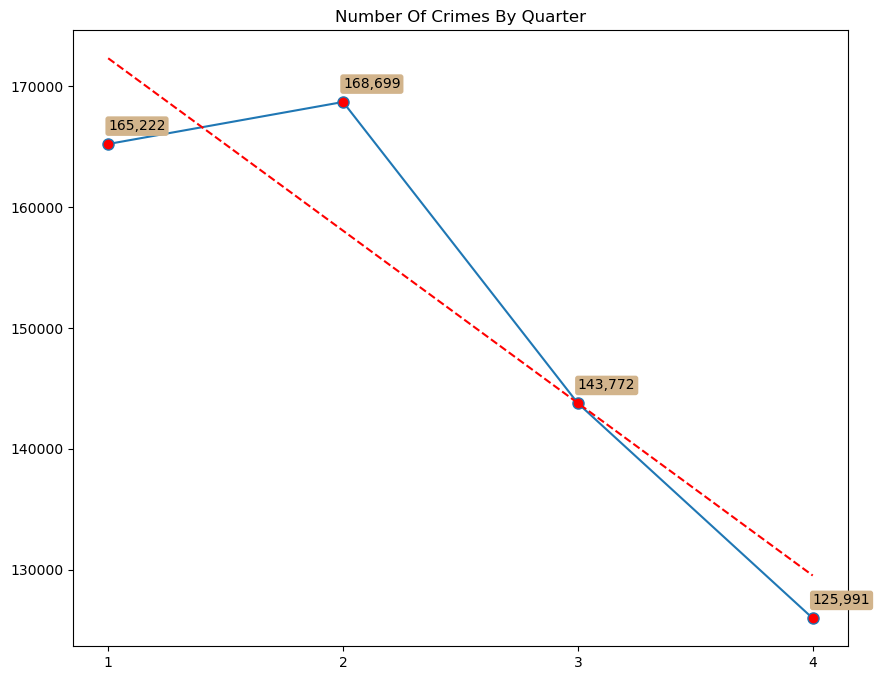

In [11]:
#crimes per quarter
Dim_Date['Quarter'] = Dim_Date['Report_Date'].dt.quarter
number_of_crimes_by_quarter = (data[['File_Number','Report_Date']].merge(Dim_Date,how = 'left',on = 'Report_Date'))['Quarter'].value_counts().reset_index().sort_values(by=['index'],ascending = [True]).rename(columns = {"index":"Quarter","Quarter":"number_of_crimes"}).reset_index(drop=True)
quarter = number_of_crimes_by_quarter['Quarter']
count = number_of_crimes_by_quarter['number_of_crimes']

fig,axe = plt.subplots(figsize = (10,8))
axe.plot(quarter,count,marker = 'o',markerfacecolor = 'red',markersize = 8)
axe.set_xticks([1,2,3,4])
axe.set_title("Number Of Crimes By Quarter")

z = np.polyfit(quarter,count,1)
p = np.poly1d(z)
plt.plot(quarter,p(quarter),'r--')


for x,y in zip(quarter,count):
    plt.annotate('{:,.0f}'.format(y),(x,y),textcoords = 'offset points',xytext = (0,10),ha = 'left',fontsize = 10,bbox = {"facecolor":"tan","edgecolor":"none","boxstyle":"round,pad=0.2"})

plt.show()

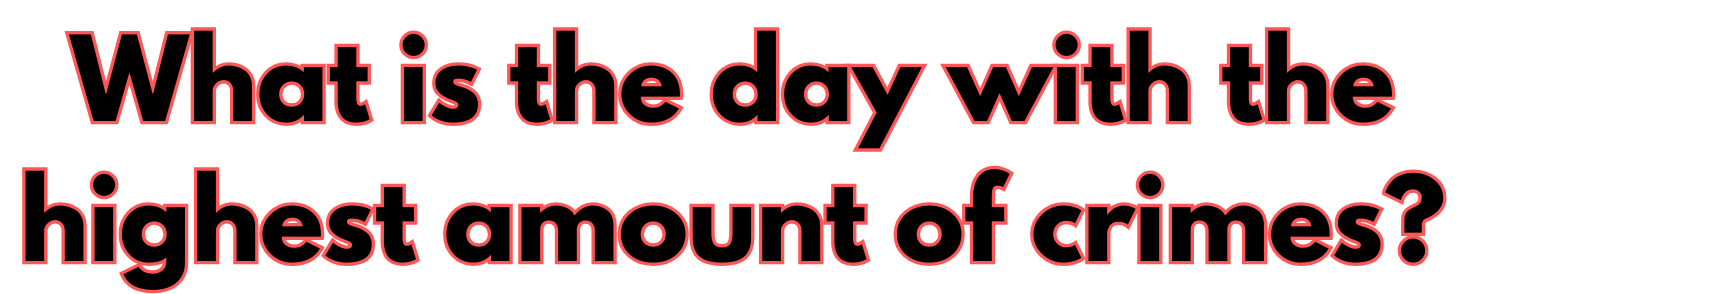

In [10]:
day_title

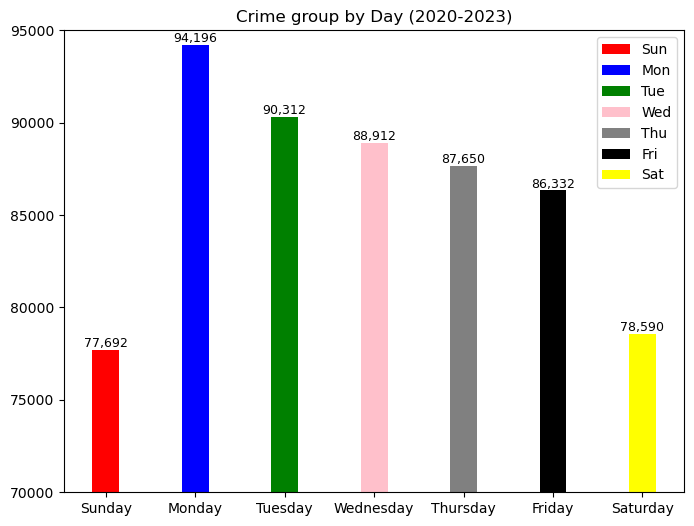

In [12]:
# The day with the highest percentage of crimes

fact_dayname = Fact[['File_Number','Report_Date','Occ_Time']].merge(Dim_Date[['Report_Date','Day_Name','Week_Day']],how = 'left', on = 'Report_Date')
crime_for_day = fact_dayname.groupby(['Day_Name','Week_Day'])['File_Number'].count().reset_index()
crime_for_day = crime_for_day.sort_values(by = 'Week_Day')
X = crime_for_day['Day_Name']
Y = crime_for_day['File_Number']


figure = plt.figure(figsize = (8,6))
plt.ylim(70000,95000)
bars = plt.bar(X,Y,color = ['r','b','g','pink','gray','black','yellow'],label = [day[:3] for day in crime_for_day['Day_Name'].tolist()],width=0.3)
plt.legend()
plt.title("Crime group by Day (2020-2023)")


for bar, value in zip(bars, Y):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height , f'{int(value):,}', ha='center', va='bottom', color='black', fontsize=9)



plt.show()
#the day with the highes amount of crimes is Monday: with 121,387 crimes reported in the data set. ⬇️

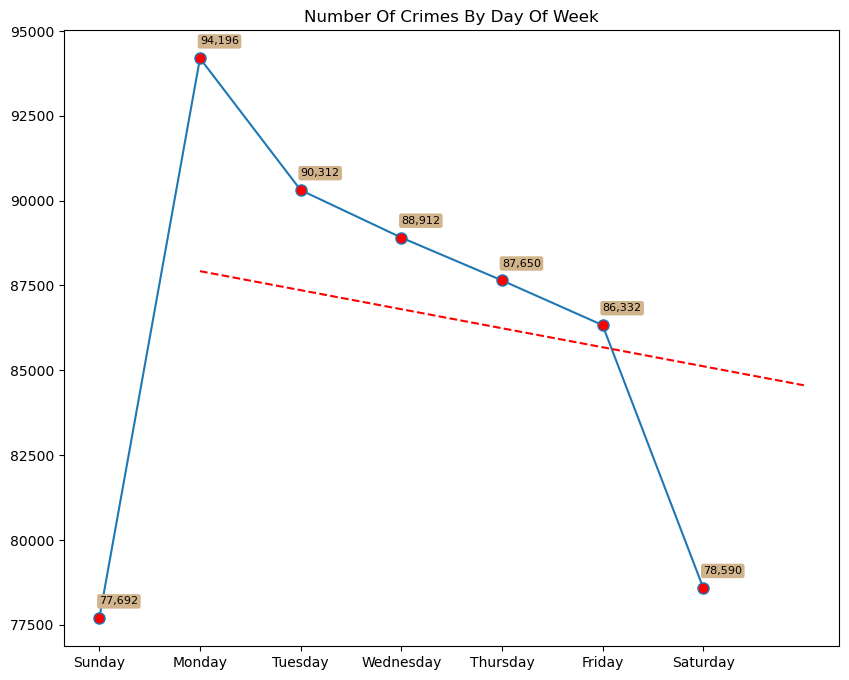

In [13]:
number_of_crimes_by_weekday = data.merge(Dim_Date,on = 'Report_Date')['Day_Name'].value_counts().reset_index().rename(columns = {"index":"Day_Name","Day_Name":"number_of_crimes"})
number_of_crimes_by_weekday['num'] = number_of_crimes_by_weekday['Day_Name'].apply(lambda x: 1 if x == 'Sunday' else 2 if x == 'Monday' else 3 if x == 'Tuesday' else 4 if x == 'Wednesday' else 5 if x == 'Thursday' else 6 if x == 'Friday' else 7  if x == 'Saturday' else 0 )
number_of_crimes_by_weekday = number_of_crimes_by_weekday.sort_values(by = ['num'],ascending = [True]).reset_index(drop=True)
dayname = number_of_crimes_by_weekday['Day_Name']
count = number_of_crimes_by_weekday['number_of_crimes']

fig,axe = plt.subplots(figsize = (10,8))
axe.plot(dayname,count,marker = 'o',markerfacecolor = 'red',markersize = 8)
axe.set_title('Number Of Crimes By Day Of Week')

z = np.polyfit(list(range(1,8)),count,1)
p = np.poly1d(z)
plt.plot(list(range(1,8)),p(list(range(1,8))),'r--')

for x,y in zip(dayname,count):
    plt.annotate('{:,.0f}'.format(y),(x,y),textcoords = 'offset points',xytext = (0,10),ha = 'left',fontsize = 8,bbox ={"facecolor":"tan","edgecolor":"none","boxstyle":"round,pad=0.2"})

plt.show()

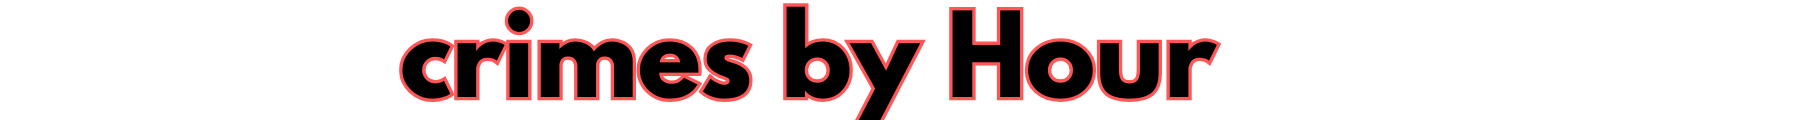

In [13]:
crimes_by_hour

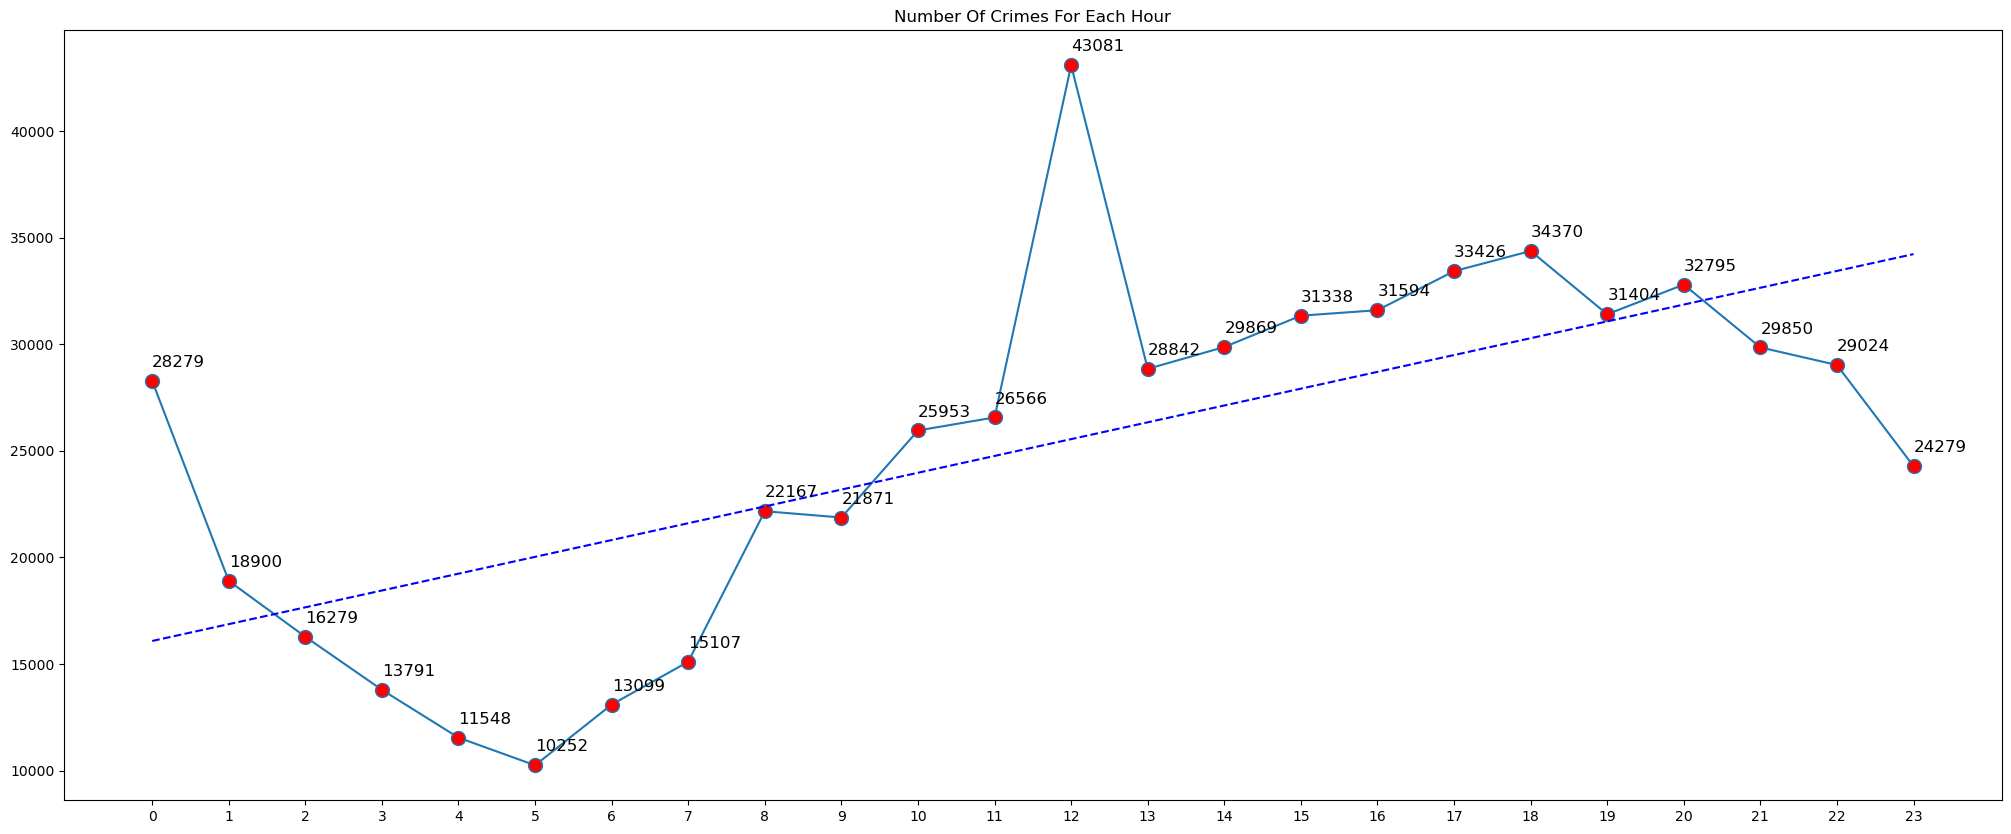

In [53]:
#Creating an Hour column for groupby
#*take a littel while to run*
from math import floor
def time_round(time):
    x = str(time)[:2] +"." + str(time)[3:5]
    y = int(x[3:5])
    x = float(x)
    if y>30:
        x+=1
    
    x = floor(x)
        
    return x
    
    
Fact['Occ_Hour'] = Fact['Occ_Time'].apply(time_round)  
Fact['Occ_Hour'] = np.where(Fact['Occ_Hour'] == 24,0,Fact['Occ_Hour'])

top_crimes_by_hour = Fact.groupby(['Occ_Hour'])['File_Number'].count().reset_index()
fig,axe = plt.subplots(figsize = (25,10))
hour = top_crimes_by_hour['Occ_Hour']
count = top_crimes_by_hour['File_Number']
axe.plot(hour,count,marker = 'o',markerfacecolor = 'r',markersize = 10)
axe.set_title('Number Of Crimes For Each Hour')

z = np.polyfit(hour, count, 1)
p = np.poly1d(z)
axe.plot(hour,p(hour), "b--")

axe.set_xticks(hour)
axe.set_xticklabels(top_crimes_by_hour['Occ_Hour'])


for x, y in zip(hour, count):
    plt.annotate(y,  # text to display
                 (x, y),  # point to label
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='left',  # horizontal alignment
                 fontsize=12)

plt.show()

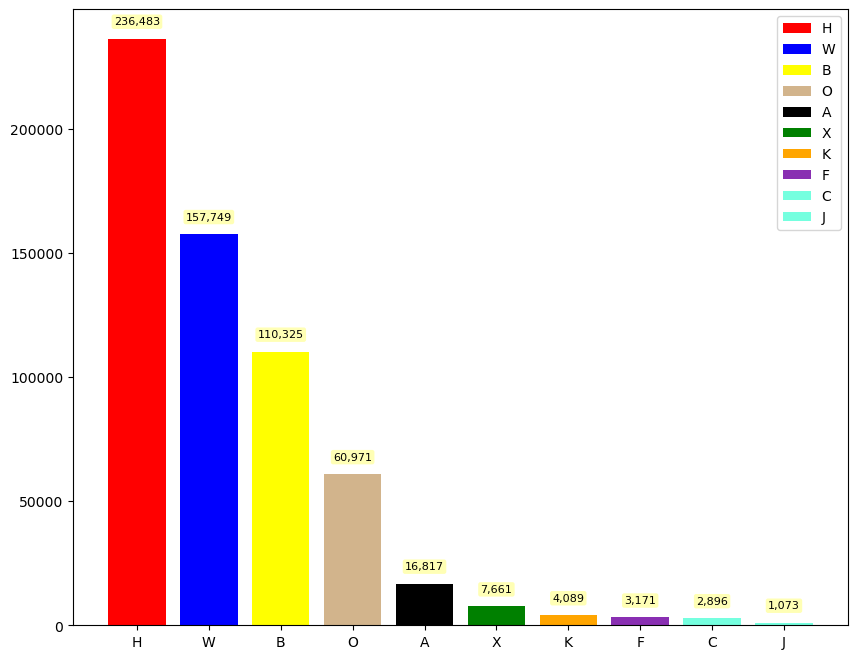

In [54]:
#crimes by race(top 10)

number_of_crimes_by_race =  data[~data['Vict_Descent'].isna()]['Vict_Descent'].value_counts().reset_index().rename(columns = {"index":"race","Vict_Descent":"count"}).head(10)

race = number_of_crimes_by_race['race']
count = number_of_crimes_by_race['count']
fig,axe = plt.subplots(figsize = (10,8))

axe.bar(race,count,color = ['red','blue','yellow','tan','black','green','orange','#892fb2','#75ffdf','#75ffdf'],label = [i for i in race.tolist()])
plt.legend()

for x,y in zip(race,count):
    plt.annotate('{:,.0f}'.format(y),(x,y),textcoords = "offset points",xytext=(0,10),ha='center',fontsize = 8,bbox = {"facecolor":"#ffffb5","edgecolor":"none","boxstyle":"round,pad=0.2"})
plt.show()


In [55]:
data['Vict_Sex'] = data['Vict_Sex'].astype(str)
data['Vict_Descent'] = data['Vict_Descent'].astype(str)
crimes_by_race_and_sex = data[(data['Vict_Sex'].isin(['F','M']))&(~data['Vict_Descent'].isna())&(data['Vict_Descent'].isin(['H','W','B','X','O']))].groupby(['Vict_Sex','Vict_Descent'])['File_Number'].count().reset_index()
sex = crimes_by_race_and_sex['Vict_Sex']
race = crimes_by_race_and_sex['Vict_Descent']
count = crimes_by_race_and_sex['File_Number']


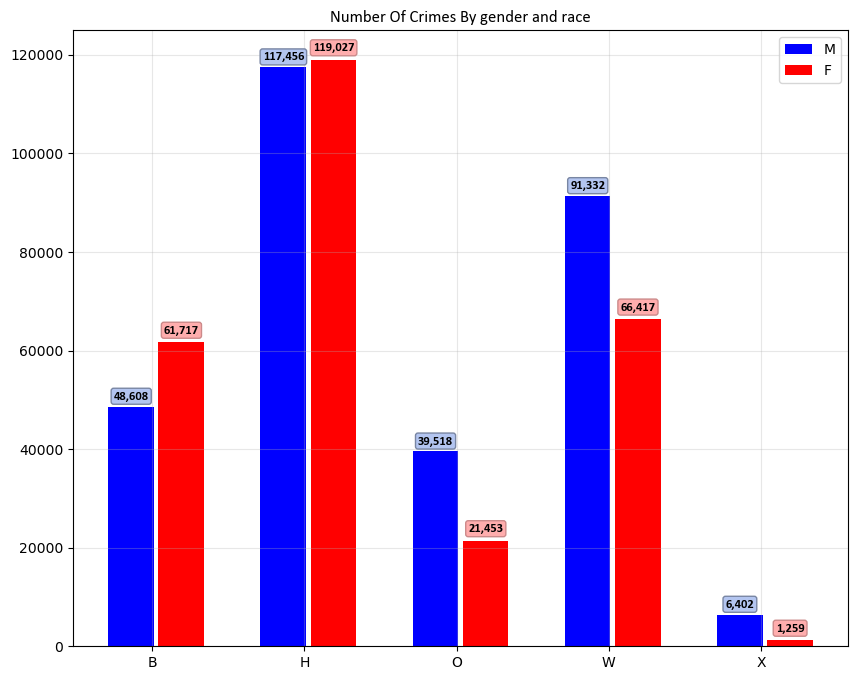

In [56]:
male_count = crimes_by_race_and_sex[crimes_by_race_and_sex['Vict_Sex'] == 'M']['File_Number']
female_count = crimes_by_race_and_sex[crimes_by_race_and_sex['Vict_Sex'] == 'F']['File_Number']
width = 0.3
fig,axe = plt.subplots(figsize = (10,8),)
axe.set_xticks([i+0.14 for i in np.arange(5)])
axe.set_xticklabels(crimes_by_race_and_sex[crimes_by_race_and_sex['Vict_Sex'] == 'M']['Vict_Descent'].tolist())
male = axe.bar(np.arange(len(male_count)),male_count,color = 'b',label = 'M',width = width)
female = axe.bar([i+0.33 for i in np.arange(len(male_count))],female_count,color = 'r',label = 'F',width = width)

for x,y in zip([i - 0.09 for i in np.arange(len(male_count))],male_count):
    plt.annotate('{:,.0f}'.format(y),(x,y),textcoords = 'offset points',xytext = (10,5),ha = 'center',fontsize = 9,bbox = {"facecolor":"#b3c5f0","edgecolor":"#7986a3","boxstyle":"round,pad = 0.2"},fontname = 'Calibri',fontweight = 'bold')
    
for x,y in zip([i+0.24 for i in np.arange(len(female_count))],female_count):
    plt.annotate('{:,.0f}'.format(y),(x,y),textcoords = 'offset points',xytext = (10,6),ha = 'center',fontsize = 9,bbox = {"facecolor":"#ffadad","edgecolor":"#cc8a8a","boxstyle":"round,pad = 0.2"},fontname = 'Calibri',fontweight = 'bold',color = 'black')
axe.legend()
axe.set_title("Number Of Crimes By gender and race",fontname = 'Calibri')
axe.grid(alpha = 0.3)

plt.show()


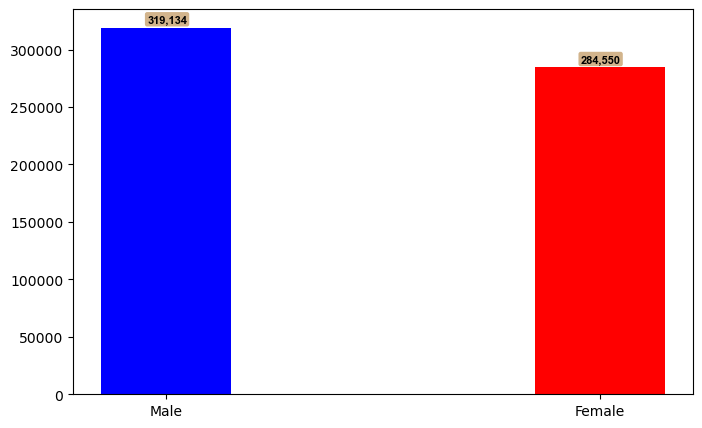

In [58]:
number_of_crimes_by_sex = data['Vict_Sex'].value_counts().reset_index().rename(columns = {"index":"sex","Vict_Sex":"count"})
number_of_crimes_by_sex = number_of_crimes_by_sex[number_of_crimes_by_sex['sex'].isin(['M','F'])]
number_of_crimes_by_sex
female_crime = number_of_crimes_by_sex[number_of_crimes_by_sex['sex'] == 'F']['count']
male_crime = number_of_crimes_by_sex[number_of_crimes_by_sex['sex'] == 'M']['count']
fig,axe = plt.subplots(figsize = (8,5))
axe.bar(number_of_crimes_by_sex['sex'],number_of_crimes_by_sex['count'],color = ['b','r'],width = 0.3)

axe.set_xticks([0,1])
for x,y in zip([-0.03,0.97],number_of_crimes_by_sex['count']):
    plt.annotate('{:,.0f}'.format(y),(x,y),textcoords = 'offset points',xytext = (10,6),fontsize = 8,ha = 'center',va = 'center',fontweight = 'bold',fontname = 'arial',bbox = {"facecolor":"tan","edgecolor":"none","boxstyle":"round,pad=0.2"})
axe.set_xticklabels(['Male','Female'])
plt.show()

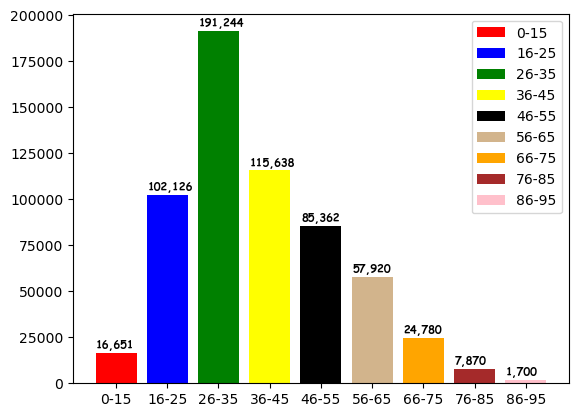

In [59]:
#crimes by age 
label = ['0-15','16-25','26-35','36-45','46-55','56-65','66-75','76-85','86-95']
bins = [0, 16, 26, 36, 46, 56, 66, 76, 86, 96]
data['age_range'] = pd.cut(data['Vict_Age'],bins = bins, labels=label )
crimes_by_age = data.groupby(['age_range'])['File_Number'].count().reset_index().rename(columns = {"File_Number":"count"})
age_range = crimes_by_age['age_range']
count = crimes_by_age['count']

fig,axe = plt.subplots()

axe.bar(age_range,count,color = ['r','b','g','yellow','black','tan','orange','brown','pink'],label = [i for i in age_range ])
axe.legend()

for x,y in zip([i -0.66 for i in np.arange(0,11)],count):
    plt.annotate('{:,.0f}'.format(y),(x,y),textcoords  ='offset points',xytext = (10,3),ha = 'left',fontsize = 8,fontweight = 'bold',fontname = 'Comic Sans MS')
plt.show()